In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,save_model
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, scale

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
apple = pd.read_csv('../data/transactions/Tech/AAPL.csv')  
google = pd.read_csv('../data/transactions/Tech/GOOG.csv')  
fb = pd.read_csv('../data/transactions/Tech/FB.csv')  
microsoft = pd.read_csv('../data/transactions/Tech/MSFT.csv')  
amazon = pd.read_csv('../data/transactions/Tech/AMZN.csv')  
print(apple.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2014-01-02  79.382858  79.575714  78.860001  79.018570  66.964325   
1  2014-01-03  78.980003  79.099998  77.204285  77.282860  65.493416   
2  2014-01-06  76.778572  78.114288  76.228569  77.704285  65.850533   
3  2014-01-07  77.760002  77.994286  76.845711  77.148575  65.379593   
4  2014-01-08  76.972855  77.937141  76.955711  77.637146  65.793633   

      Volume  
0   58671200  
1   98116900  
2  103152700  
3   79302300  
4   64632400  


In [43]:
scl = MinMaxScaler()
def getStock(stock):
    stock = stock.drop(['Date'],axis=1)
    stock=stock.astype('float64')
    close = stock['Close']
    
    stock = scl.fit_transform(stock)

    return stock ,scale(close)

def processData(stock,input_unit,output_unit):
    data,result = getStock(stock)
    X,Y = [],[]
    for i in range(len(data)-input_unit-output_unit):
        X.append(data[i:(i+input_unit)])
        temp = [result[j+i+input_unit] for j in range(output_unit)]
        Y.append(temp)
    return np.array(X),np.array(Y)



In [54]:
#model parameters
cell_unit = 64
learn_rate = 1e-2
decay_rate = 1e-6
train_epochs = 300

#input parameters
intput = apple
time_num = 10
output_num = 5
precentage = 0.75
data,result = processData(intput,time_num,output_num)


In [55]:
samples_num = data.shape[1]
features_num = data.shape[2]
print(data.shape)
print(result.shape)
n = len(data)
train_size = int(n*precentage)
data_train,data_test = data[0:train_size],data[train_size:]
result_train,result_test = result[0:train_size],result[train_size:]
print(data_train.shape)
print(result_train.shape)

(1243, 10, 6)
(1243, 5)
(932, 10, 6)
(932, 5)


In [56]:
# basic model

model = Sequential() # most common
model.add(LSTM(cell_unit, input_shape = (time_num,features_num))) 

#model.add(Dropout(0.2))
#model.add(LSTM(cell_unit//2, input_shape = (time_num,features_num), return_sequences=False)) 
#model.add(Dropout(0.2))

#model.add(Dense(16, kernel_initializer='uniform', activation = 'relu'))

model.add(Dense(output_num))

model.compile(optimizer='Adam', loss='mse') 
callback = EarlyStopping(monitor='val_loss', patience=10,verbose=1,mode='auto')
history = model.fit(data_train,result_train, epochs = train_epochs, validation_data=(data_test,result_test),shuffle=False,callbacks =[callback])

Train on 932 samples, validate on 311 samples
Epoch 1/300
932/932 [==============================] - 2s 2ms/step - loss: 0.6064 - val_loss: 4.4954
Epoch 2/300
932/932 [==============================] - 0s 411us/step - loss: 0.4038 - val_loss: 3.2595
Epoch 3/300
932/932 [==============================] - 0s 403us/step - loss: 0.3768 - val_loss: 2.7331
Epoch 4/300
932/932 [==============================] - 0s 385us/step - loss: 0.1707 - val_loss: 1.0221
Epoch 5/300
932/932 [==============================] - 0s 378us/step - loss: 0.1131 - val_loss: 0.8669
Epoch 6/300
932/932 [==============================] - 0s 391us/step - loss: 0.0605 - val_loss: 0.5470
Epoch 7/300
932/932 [==============================] - 0s 384us/step - loss: 0.0771 - val_loss: 0.4566
Epoch 8/300
932/932 [==============================] - 0s 384us/step - loss: 0.0692 - val_loss: 0.3895
Epoch 9/300
932/932 [==============================] - 0s 387us/step - loss: 0.0683 - val_loss: 0.4660
Epoch 10/300
932/932 [=======

[[-1.4019533 -1.3992765 -1.4044273 -1.3863612 -1.4255704]
 [-1.4031847 -1.39809   -1.4026707 -1.3864194 -1.4239794]
 [-1.4102508 -1.4077545 -1.4134215 -1.3961293 -1.4360491]
 [-1.4140537 -1.4106895 -1.4151877 -1.3980293 -1.4380795]
 [-1.4016631 -1.3962214 -1.3998694 -1.384567  -1.4212998]]


ValueError: x and y must have same first dimension, but have shapes (1,) and (5,)

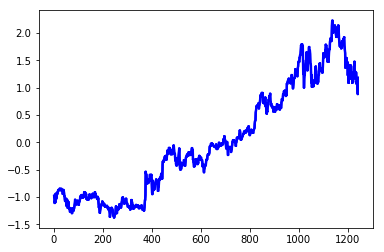

In [65]:


test_x, test_y = processData(google,time_num,output_num)
Xt = model.predict(test_x)


res = np.array(google['Close'])

print(Xt[:5])
prediction = Xt

real = test_y
plt.plot(real,color="blue")
for i in range(len(prediction)):
    if i%10 == 0:   
        for j in range(output_num):
            plt.plot(i,prediction[j],color='r')
plt.show()

In [28]:
save_model(model,'stock_model')